In [6]:
# !pip install pandas
# !pip install altair
# !pip install WordNet
# !pip install gensim
# !pip install nltk
# import nltk
# nltk.download('omw-1.4')
# nltk.download('wordnet')
# !pip install matplotlib
# !pip install wordcloud
# !pip install spacy
# !python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 8.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import pandas as pd
from nltk import WordNetLemmatizer
import gensim
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import spacy


In [7]:
nlp = spacy.load('en_core_web_sm')

In [9]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\parler-hate-speech-main\parler-hate-speech-main\parler_annotated_data.csv")

In [10]:
df

id  \
0      a113a2d777ca4211ae97a193eee44dc1   
1      bb348c5f20a84be1bc3467d32312341c   
2      39df38e04a44423f93ba1d1dc79070c9   
3      68dd325894274be79f73767e92e64702   
4      9503e349140b4bbe9e496f4c0f15f830   
...                                 ...   
10116  bd2e05ec9a7942b78fbedab3d75d1079   
10117  23ce3d9f0f09448abe4665b93dab2aef   
10118  163f0fad195c4cb58ef31920921a1ab9   
10119  ca70cdcc29084720990fc21ca6a3e31d   
10120  82f4a352d8f94762adf8d33593f42f6a   

                                                    text  label_mean  \
0      Black men are taught that a word justifies all...        3.60   
1      Biden and his supporters are claiming that Bid...        4.00   
2      Pelosi; âOne way or another Joe Biden will b...        1.25   
3      Northern California Declares Independence From...        3.00   
4      Whistleblower claims top DHS officials sought ...        1.50   
...                                                  ...         ...   
10116  Minneapolis City Council Votes To Eliminate Po...        1.00   
10117                And just like that facebook is gone        1.00   
10118  Obama Says He Will Campaign For Biden If He Ca...        1.00   
10119                               Shoup Voting Machine        1.00   
10120  Iranian official accuses Israel of using 'elec...        1.50   

       disputable_post  
0                 True  
1                 True  
2                False  
3                 True  
4                False  
...                ...  
10116            False  
10117            False  
10118            False  
10119            False  
10120            False  

[10121 rows x 4 columns]

In [11]:
def lemmatize(token):
    return WordNetLemmatizer().lemmatize(token, pos='v')

def tokenize(tweet):
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize(token))
    res = ' '.join(result)
    return res

def preprocess(tweet):
    result = re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    result = re.sub(r'(@[A-Za-z0-9-_]+)', '', result)
    result = re.sub(r'http\S+', '', result)
    result = re.sub(r'bit.ly/\S+', '', result)
    result = re.sub(r'(.)\1+', r'\1\1', result)
    result = " ".join(re.findall('[A-Z][^A-Z]*', result)) 
    result = re.sub(r'&[\S]+?;', '', result)
    result = re.sub(r'#', ' ', result)
    result = re.sub(r'[^\w\s]', r'', result)    
    result = re.sub(r'\w*\d\w*', r'', result)
    result = re.sub(r'\s\s+', ' ', result)
    result = re.sub(r'(\A\s+|\s+\Z)', '', result)
    result = tokenize(result)
    return result

def wordcloud(txt):    
    wc = WordCloud(mode="RGBA", max_words=5000,
                   stopwords=STOPWORDS, max_font_size=500, random_state=42)

    wc.generate(txt)
    # show
    fig, axes = plt.subplots(1, 1)
    axes.imshow(wc, interpolation="bilinear")
    fig.set_figheight(20)
    fig.set_figwidth(20)
    axes.set_axis_off()
    plt.show()

In [12]:
df["new_text"] = df["text"].apply(preprocess)

In [13]:
df

id  \
0      a113a2d777ca4211ae97a193eee44dc1   
1      bb348c5f20a84be1bc3467d32312341c   
2      39df38e04a44423f93ba1d1dc79070c9   
3      68dd325894274be79f73767e92e64702   
4      9503e349140b4bbe9e496f4c0f15f830   
...                                 ...   
10116  bd2e05ec9a7942b78fbedab3d75d1079   
10117  23ce3d9f0f09448abe4665b93dab2aef   
10118  163f0fad195c4cb58ef31920921a1ab9   
10119  ca70cdcc29084720990fc21ca6a3e31d   
10120  82f4a352d8f94762adf8d33593f42f6a   

                                                    text  label_mean  \
0      Black men are taught that a word justifies all...        3.60   
1      Biden and his supporters are claiming that Bid...        4.00   
2      Pelosi; âOne way or another Joe Biden will b...        1.25   
3      Northern California Declares Independence From...        3.00   
4      Whistleblower claims top DHS officials sought ...        1.50   
...                                                  ...         ...   
10116  Minneapolis City Council Votes To Eliminate Po...        1.00   
10117                And just like that facebook is gone        1.00   
10118  Obama Says He Will Campaign For Biden If He Ca...        1.00   
10119                               Shoup Voting Machine        1.00   
10120  Iranian official accuses Israel of using 'elec...        1.50   

       disputable_post                                           new_text  
0                 True  black men teach word justify form violence whi...  
1                 True  biden supporters claim biden bring country bri...  
2                False                    pelosi way joe biden presidentâ  
3                 True  northern california declare independence china...  
4                False  whistleblower claim officials seek alter intel...  
...                ...                                                ...  
10116            False  minneapolis city council vote eliminate police...  
10117            False                                   like facebook go  
10118            False  obama say campaign biden work busy memoir writ...  
10119            False                                 shoup vote machine  
10120            False  iranian official accuse israel electronic devi...  

[10121 rows x 5 columns]

<AxesSubplot: >

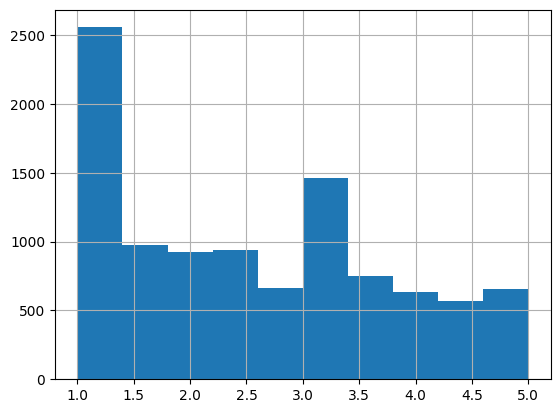

In [14]:
df["label_mean"].hist()

1


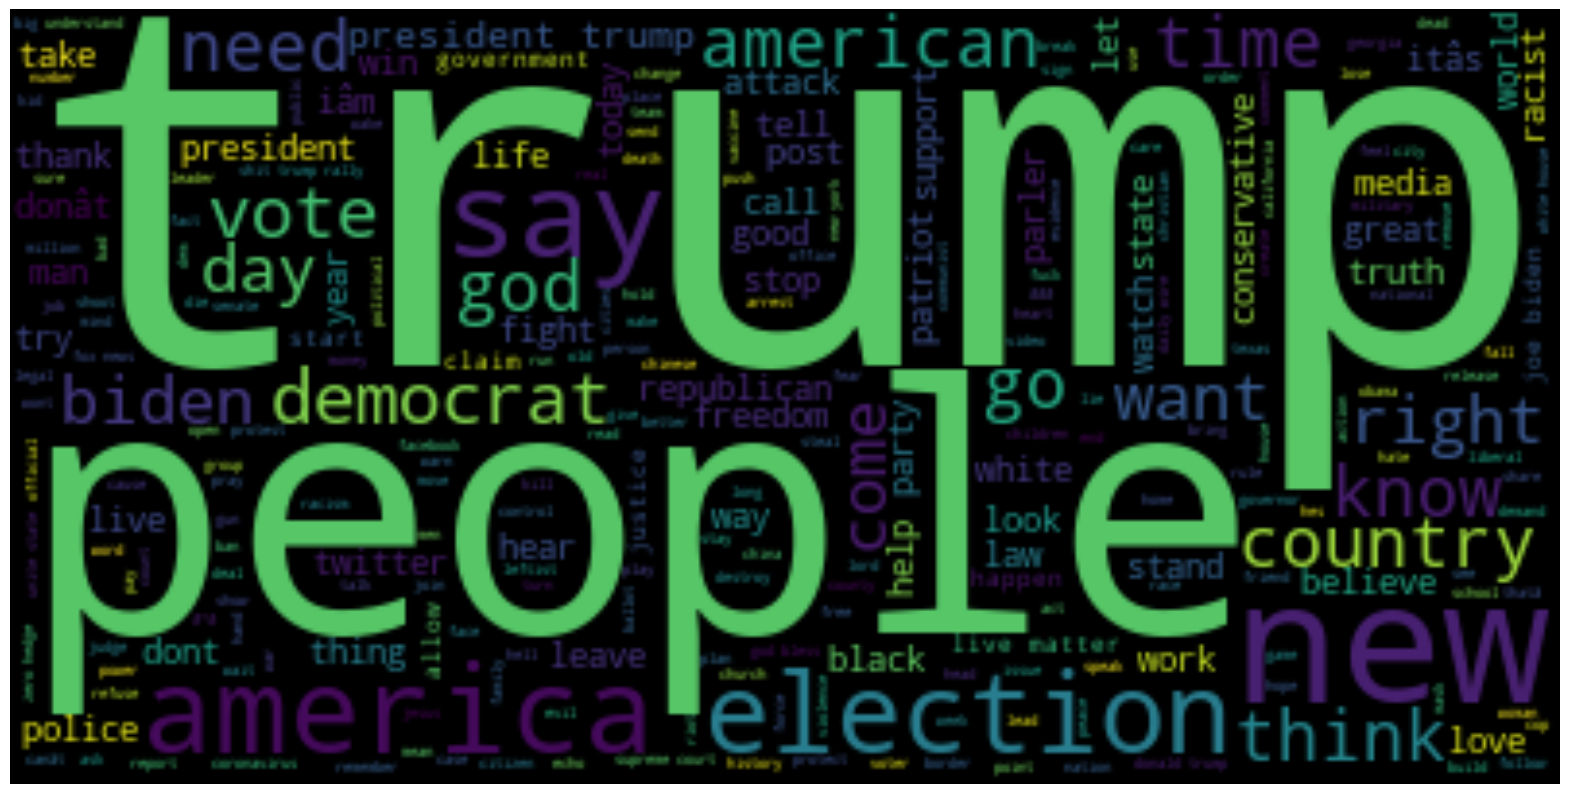

2


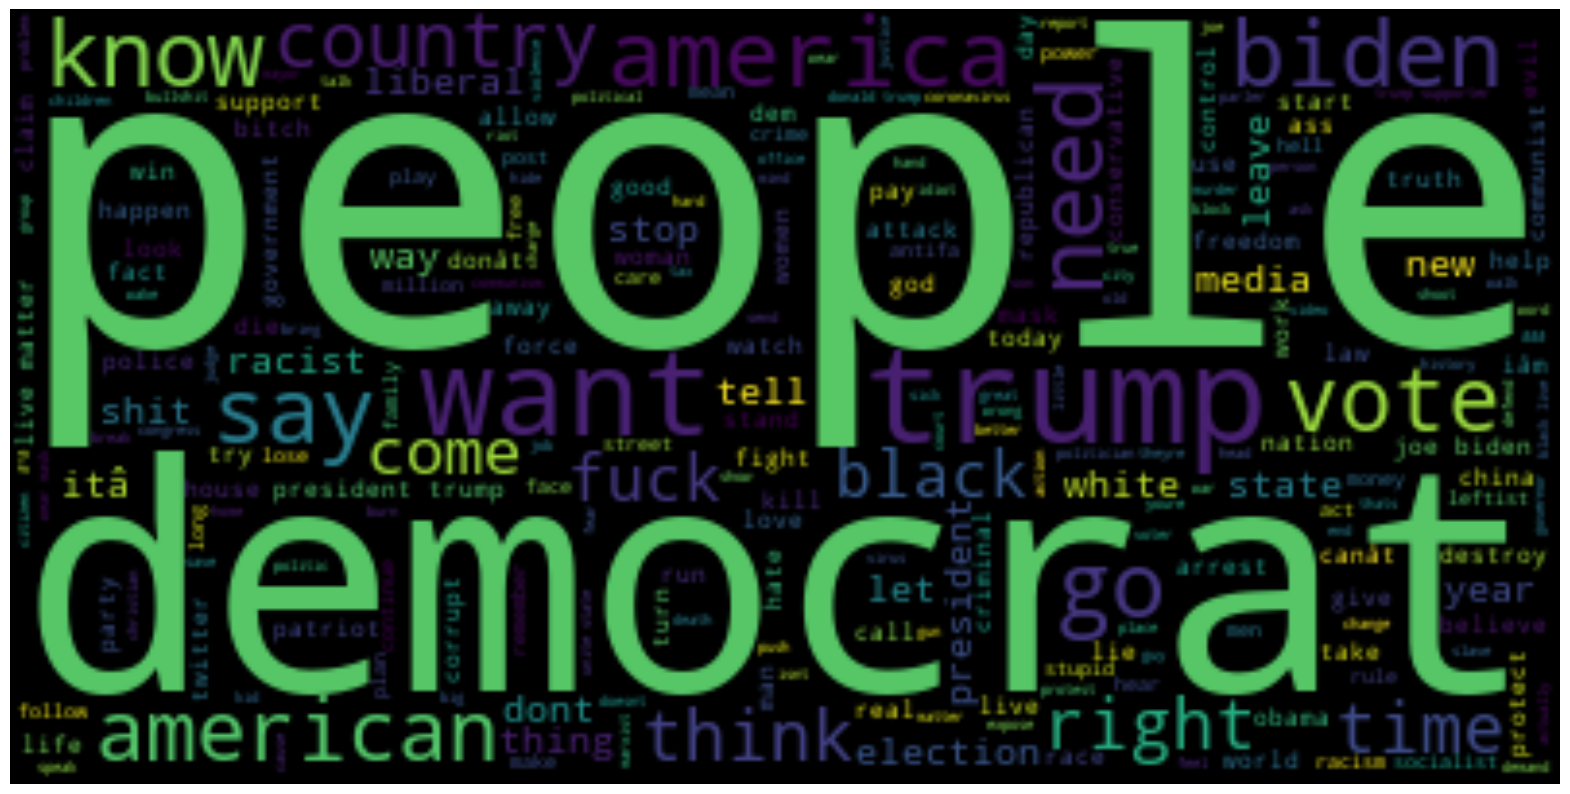

3


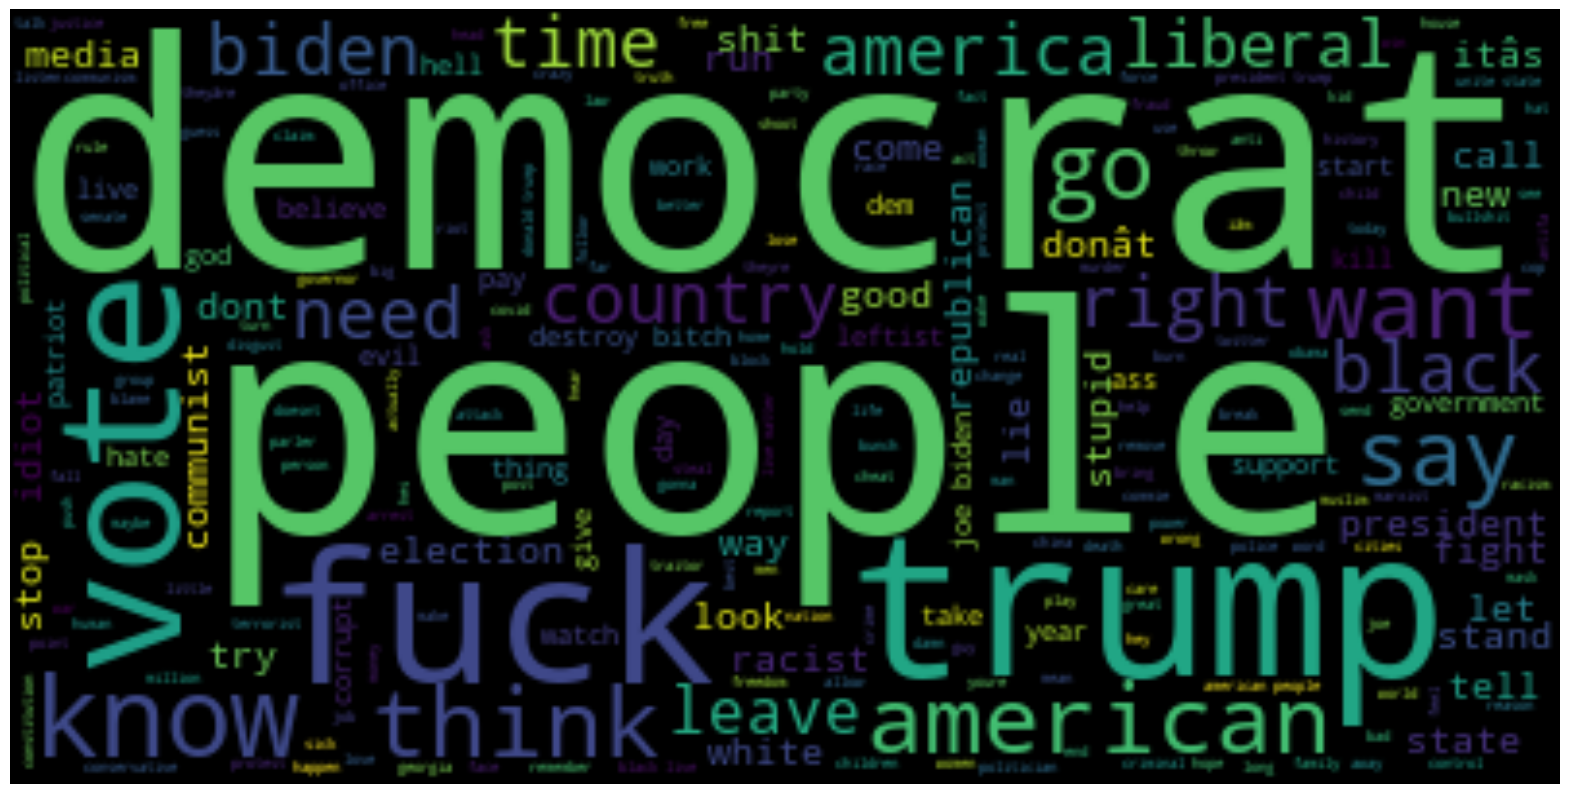

4


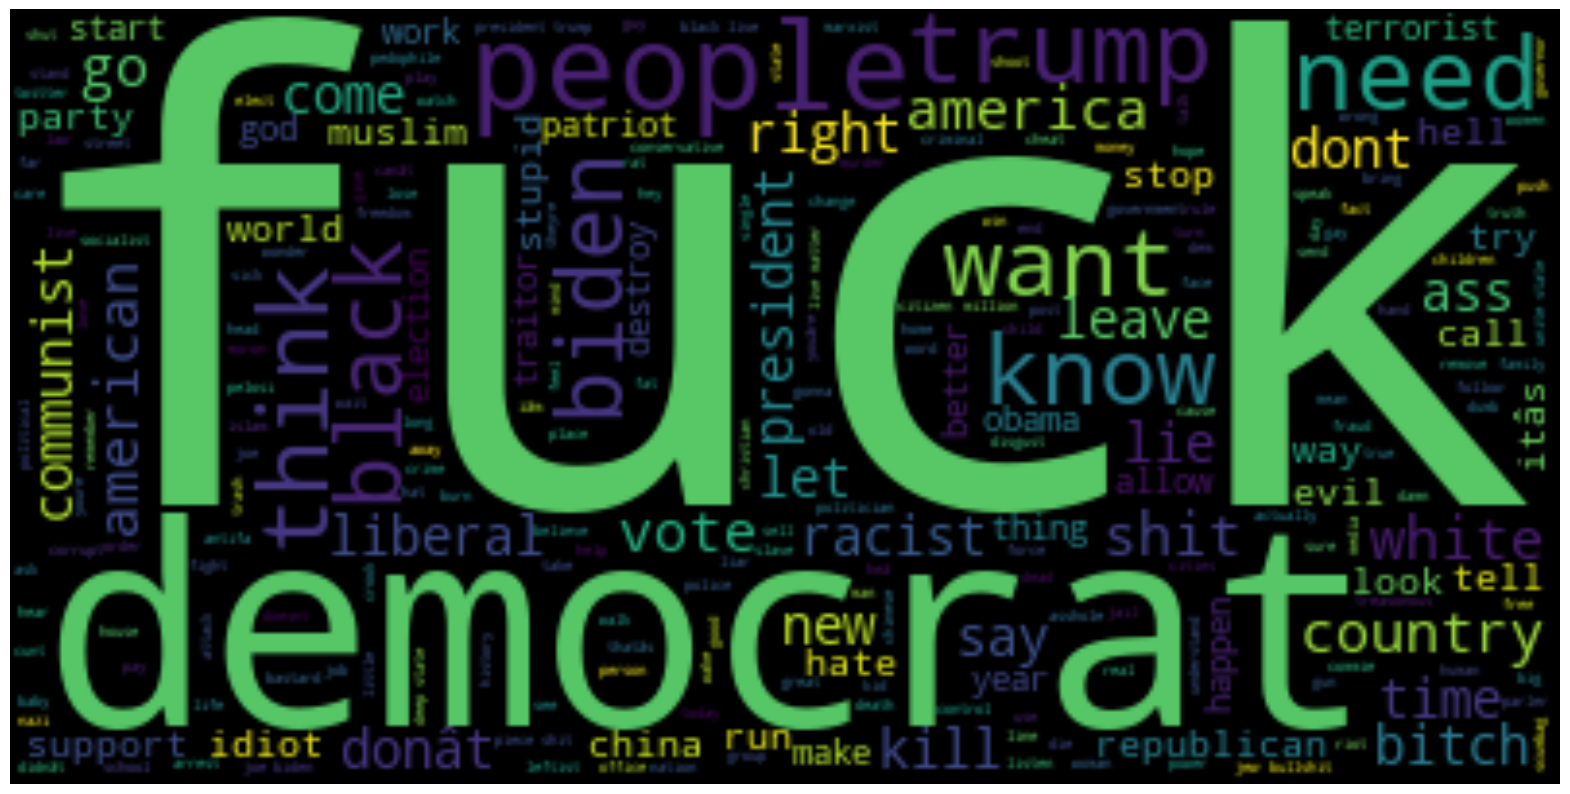

5


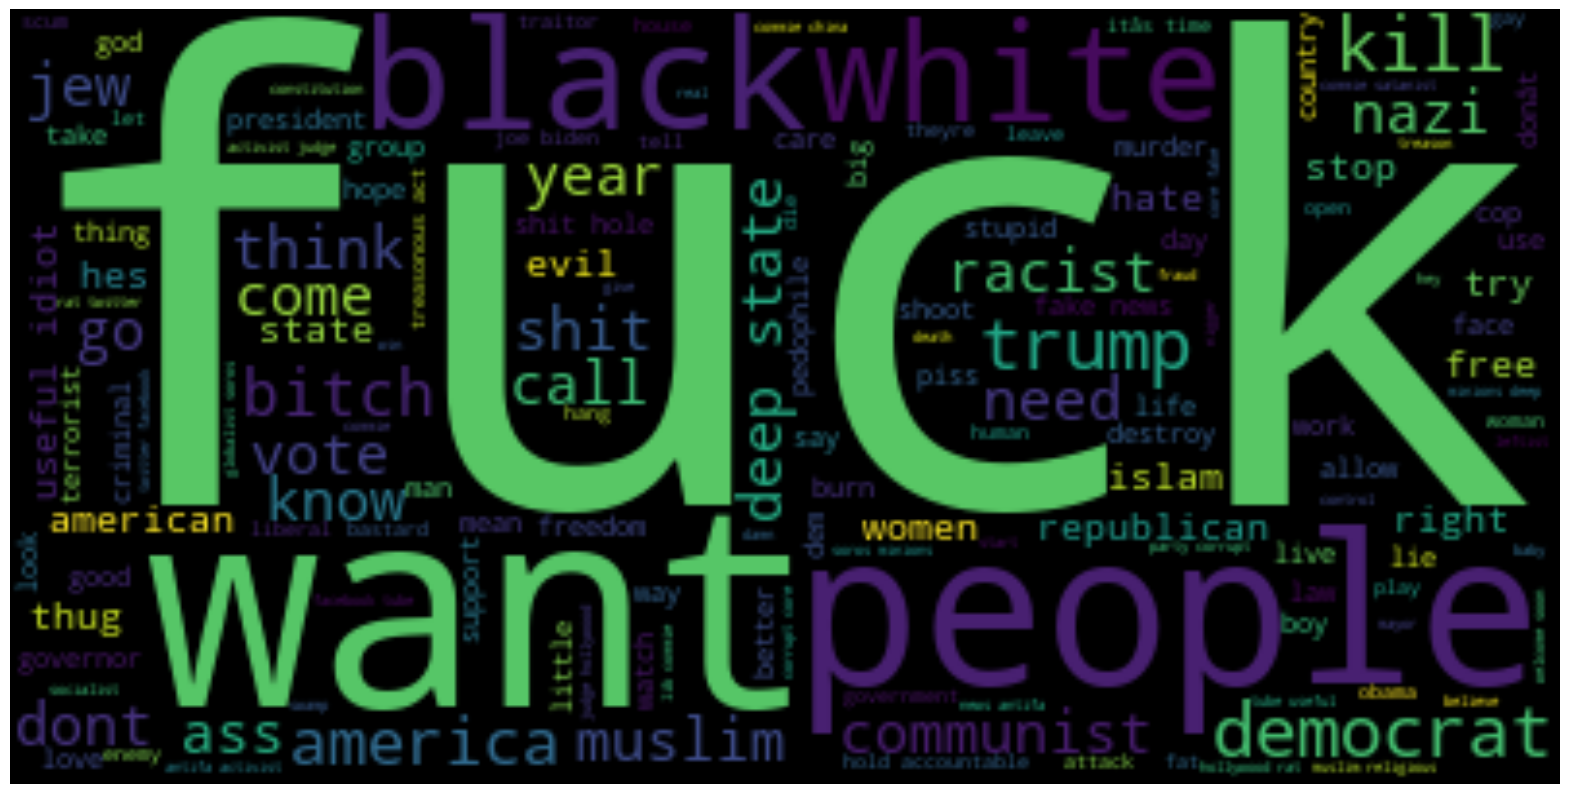

In [15]:
for score in range(1,6):
    print(score)
    wordcloud(' '.join(df[(score<=df["label_mean"])&(df["label_mean"]<score+1)]["new_text"].values.ravel()))

In [18]:
df["ent"] = df['text'].apply(lambda x: list(nlp(x).ents))
df

id  \
0      a113a2d777ca4211ae97a193eee44dc1   
1      bb348c5f20a84be1bc3467d32312341c   
2      39df38e04a44423f93ba1d1dc79070c9   
3      68dd325894274be79f73767e92e64702   
4      9503e349140b4bbe9e496f4c0f15f830   
...                                 ...   
10116  bd2e05ec9a7942b78fbedab3d75d1079   
10117  23ce3d9f0f09448abe4665b93dab2aef   
10118  163f0fad195c4cb58ef31920921a1ab9   
10119  ca70cdcc29084720990fc21ca6a3e31d   
10120  82f4a352d8f94762adf8d33593f42f6a   

                                                    text  label_mean  \
0      Black men are taught that a word justifies all...        3.60   
1      Biden and his supporters are claiming that Bid...        4.00   
2      Pelosi; âOne way or another Joe Biden will b...        1.25   
3      Northern California Declares Independence From...        3.00   
4      Whistleblower claims top DHS officials sought ...        1.50   
...                                                  ...         ...   
10116  Minneapolis City Council Votes To Eliminate Po...        1.00   
10117                And just like that facebook is gone        1.00   
10118  Obama Says He Will Campaign For Biden If He Ca...        1.00   
10119                               Shoup Voting Machine        1.00   
10120  Iranian official accuses Israel of using 'elec...        1.50   

       disputable_post                                           new_text  \
0                 True  black men teach word justify form violence whi...   
1                 True  biden supporters claim biden bring country bri...   
2                False                    pelosi way joe biden presidentâ   
3                 True  northern california declare independence china...   
4                False  whistleblower claim officials seek alter intel...   
...                ...                                                ...   
10116            False  minneapolis city council vote eliminate police...   
10117            False                                   like facebook go   
10118            False  obama say campaign biden work busy memoir writ...   
10119            False                                 shoup vote machine   
10120            False  iranian official accuse israel electronic devi...   

                                                     doc  \
0      (Black, men, are, taught, that, a, word, justi...   
1      (Biden, and, his, supporters, are, claiming, t...   
2      (Pelosi, ;, âOne, way, or, another, Joe, Bid...   
3      (Northern, California, Declares, Independence,...   
4      (Whistleblower, claims, top, DHS, officials, s...   
...                                                  ...   
10116  (Minneapolis, City, Council, Votes, To, Elimin...   
10117        (And, just, like, that, facebook, is, gone)   
10118  (Obama, Says, He, Will, Campaign, For, Biden, ...   
10119                           (Shoup, Voting, Machine)   
10120  (Iranian, official, accuses, Israel, of, using...   

                                                     ent  
0                                                     []  
1       [(Biden), (Biden), (Biden), (American), (Biden)]  
2                                         [(Joe, Biden)]  
3      [(Northern, California, Declares, Independence...  
4                                       [(DHS), (Trump)]  
...                                                  ...  
10116  [(Minneapolis, City, Council, Votes, To, Elimi...  
10117                                                 []  
10118  [(Obama), (He, Can, Work, It, Into, His, Busy,...  
10119                                                 []  
10120         [(Iranian), (Israel), (Fox, News), (iran)]  

[10121 rows x 7 columns]